Kelompok 2Pendo :
1.	Archie Citra Muhammad
2.	Nur Amilah
3.	Rahmawati Glamindia 
4.	Bernard Kian Yuniantoro 
5.	Mercy Eunike


# Stage 2 - Pre Processing Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
df = pd.read_csv('D:/Rakamin/Final Project/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,"96,270.64",0
9996,9997,15569892,Johnstone,516,France,Male,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,"42,085.58",1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,"75,075.31",2,1,0,"92,888.52",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
cats = ['Surname', 'Geography', 'Gender']
nums = ['RowNumber','CustomerId','CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

In [7]:
df[nums].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


Beberapa pengamatan:
1. Kolom `CreditScore` tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `RowNumber`,`CustomerId` bisa di-drop di langkah selanjutnya
3. Kolom `Age` tampaknya skew ke kanan (long-right tail), mungkin dapat dilakukan transformasi log nantinya
4. Kolom `HasCrCard`, `IsActiveMember`, dan `Exited` ternyata bernilai boolean/binary

In [8]:
df[cats].describe()

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Beberapa pengamatan:
1. Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh Male (`Gender`) dan France (`Geography`)
2. Kolom `Surname` memiliki kardinalitas (jumlah unique values) yang cukup tinggi (2932). Tampaknya kita perlu exclude fitur ini dari dataset untuk pemodelan.

# Preprocessing

## Feature Selection

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

### Missing Data

In [10]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Tidak terdapat missing data

### Duplicated Data

In [11]:
df.duplicated().sum()

0

Tidak terdapat duplicated data

## Train Test Split

In [12]:
X = df.drop(columns = ['Exited'])
y = df[['Exited']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 10) (2000, 10) (8000, 1) (2000, 1)


### Outliers Handling

<AxesSubplot:xlabel='Age', ylabel='Density'>

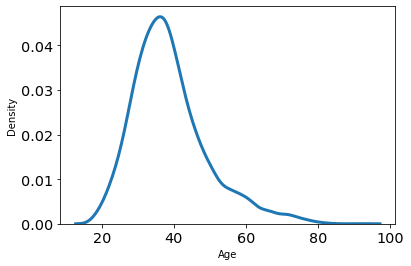

In [14]:
sns.kdeplot(X_train['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

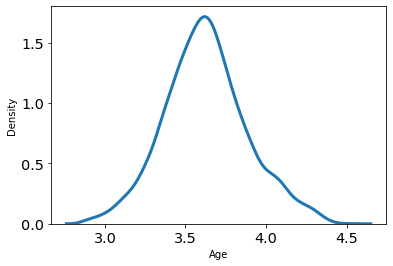

In [15]:
# distribusi Age (setelah log transformation)
sns.kdeplot(np.log(X_train['Age']))

In [16]:
# maka kita transform
X_train['log_Age'] = np.log(X_train['Age'])
X_test['log_Age'] = np.log(X_test['Age'])

In [17]:
#Actual Outlier Handling Using Z-score method
nums_updated = ['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','log_Age','Exited']

X_train['Exited']=y_train
print(f'Jumlah baris sebelum memfilter outlier: {len(X_train)}')

filtered_entries = np.array([True] * len(X_train))

for col in nums_updated:
    zscore = abs(stats.zscore(X_train[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
X_train = X_train[filtered_entries]# filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(X_train)}')

Jumlah baris sebelum memfilter outlier: 8000
Jumlah baris setelah memfilter outlier: 7839


In [18]:
y_train = X_train[['Exited']]
X_train = X_train.drop(columns = ['Exited'])

## Feature Transformation

In [19]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,log_Age
count,"7,839.00","7,839.00","7,839.00","7,839.00","7,839.00","7,839.00","7,839.00","7,839.00","7,839.00"
mean,651.71,38.35,5.00,"76,043.82",1.52,0.70,0.51,"100,419.35",3.62
std,96.16,9.68,2.88,"62,492.74",0.55,0.46,0.50,"57,516.64",0.25
min,363.00,18.00,0.00,0.00,1.00,0.00,0.00,90.07,2.89
25%,585.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,384.00",3.47
50%,653.00,37.00,5.00,"96,340.81",1.00,1.00,1.00,"100,408.31",3.61
75%,719.00,43.00,7.00,"127,578.45",2.00,1.00,1.00,"149,613.97",3.76
max,850.00,70.00,10.00,"250,898.09",3.00,1.00,1.00,"199,970.74",4.25


In [20]:
# semua kolom kita standarisasi (karena sudah mendekati distribusi normal)
ss = StandardScaler()

nums_updated = ['CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','log_Age']
for n in nums_updated:
    scaler = ss.fit(X_train[[n]])
    X_train[n] = scaler.transform(X_train[[n]])
    X_test[n] = scaler.transform(X_test[[n]])

In [21]:
X_train.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,log_Age
count,"7,839.00","7,839.00","7,839.00","7,839.00","7,839.00","7,839.00","7,839.00","7,839.00","7,839.00"
mean,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.00,-2.10,-1.74,-1.22,-0.94,-1.54,-1.01,-1.74,-2.93
25%,-0.69,-0.66,-0.69,-1.22,-0.94,-1.54,-1.01,-0.85,-0.61
50%,0.01,-0.14,-0.00,0.32,-0.94,0.65,0.99,-0.00,-0.02
75%,0.70,0.48,0.69,0.82,0.88,0.65,0.99,0.86,0.59
max,2.06,3.27,1.74,2.80,2.69,0.65,0.99,1.73,2.55


In [22]:
X_test.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,log_Age
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,-0.06,0.07,0.02,0.03,0.01,0.02,0.03,-0.03,0.06
std,1.02,1.07,1.02,0.99,1.07,0.99,1.00,1.00,1.03
min,-3.14,-2.10,-1.74,-1.22,-0.94,-1.54,-1.01,-1.75,-2.93
25%,-0.77,-0.66,-1.04,-1.22,-0.94,-1.54,-1.01,-0.88,-0.61
50%,-0.05,-0.04,-0.00,0.38,-0.94,0.65,0.99,-0.03,0.09
75%,0.63,0.58,1.04,0.83,0.88,0.65,0.99,0.82,0.68
max,2.06,5.54,1.74,2.24,4.51,0.65,0.99,1.73,3.66


## Feature Encording

In [23]:
cats_updated = ['Gender', 'Geography']

for col in cats_updated:
    print(f'value counts of column {col}')
    print(X_train[col].value_counts())
    print('---'*10, '\n')
    print(X_test[col].value_counts())
    print('---'*10, '\n')

value counts of column Gender
Male      4290
Female    3549
Name: Gender, dtype: int64
------------------------------ 

Male      1095
Female     905
Name: Gender, dtype: int64
------------------------------ 

value counts of column Geography
France     3913
Spain      1964
Germany    1962
Name: Geography, dtype: int64
------------------------------ 

France     1020
Germany     498
Spain       482
Name: Geography, dtype: int64
------------------------------ 



Strategi encoding
* `Gender` dan `Geopraphy` \: One Hot Encoding

In [24]:
for cat in ['Geography', 'Gender']:
    onehots_train = pd.get_dummies(X_train[cat], prefix=cat)
    onehots_test = pd.get_dummies(X_test[cat], prefix=cat)
    X_train = X_train.join(onehots_train)
    X_test = X_test.join(onehots_test)

Kesimpulan Data Cleansing :
1. Tidak ada missing values
2. Tidak ada duplicated data
3. Handle outliers menggunakan metode z-score dihasilkan sebagai berikut
    * Sebelum melakukan handle outliers dilakukan tranform log pada feature `Age`
    * Jumlah baris sebelum memfilter outlier: 8000
    * Jumlah baris setelah memfilter outlier: 7839
4. Feature transformation menggunakan standarisasi/ StandardScaler() pada feature numerik : [`CreditScore`,`Age`, `Tenure`,`Balance`,`NumOfProducts`,`HasCrCard`,`IsActiveMember`,`EstimatedSalary`,`log_Age`]
5. Feature encoding dilakukan sebagai berikut
    * `Gender` \: label encoding
    * `Geopraphy` \: One Hot Encoding 
6. Handle class imbalance tidak dilakukan karena tidak ada feature/label yang lebih dari 9:1

### Drop kolom-kolom yang outdated

In [25]:
X_train = X_train.drop(columns=['Age', 'Geography','Gender'])
X_test = X_test.drop(columns=['Age', 'Geography','Gender'])

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7839 entries, 9254 to 7270
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        7839 non-null   float64
 1   Tenure             7839 non-null   float64
 2   Balance            7839 non-null   float64
 3   NumOfProducts      7839 non-null   float64
 4   HasCrCard          7839 non-null   float64
 5   IsActiveMember     7839 non-null   float64
 6   EstimatedSalary    7839 non-null   float64
 7   log_Age            7839 non-null   float64
 8   Geography_France   7839 non-null   uint8  
 9   Geography_Germany  7839 non-null   uint8  
 10  Geography_Spain    7839 non-null   uint8  
 11  Gender_Female      7839 non-null   uint8  
 12  Gender_Male        7839 non-null   uint8  
dtypes: float64(8), uint8(5)
memory usage: 847.5 KB


In [28]:
X_train.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,log_Age,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,0.36,0.35,-1.22,0.88,0.65,0.99,1.37,-0.61,1,0,0,0,1
1561,-0.20,-0.35,0.70,0.88,0.65,0.99,1.66,0.49,0,1,0,0,1
1670,-0.96,-0.69,0.62,-0.94,0.65,-1.01,-0.25,-1.77,0,0,1,0,1
6087,-0.94,1.39,0.95,-0.94,0.65,-1.01,0.92,-1.29,1,0,0,1,0
6669,-1.40,1.39,1.06,-0.94,-1.54,-1.01,-1.06,1.65,1,0,0,0,1


Kesimpulan :
1. Feature selection dilakukan pada feature `RowNumber`,`CustomerId`,`Surname` karena kurang relevan dengan modelling
2. Tidak ada Feature extraction yang dibuat
3. Tidak ada feature tambahan

## Oversampling

In [29]:
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)

In [30]:
print(X_train_smote.shape, y_train_smote.shape)

(12506, 13) (12506, 1)


In [31]:
Not_Churn = []
Churn = []

for i in y_train_smote['Exited']: 
    if(i == 1):
        Not_Churn.append(i)
    else :
        Churn.append(i)

print('Not_Churn:', len(Churn))
print('Churn:', len(Churn))

Not_Churn: 6253
Churn: 6253


## Statified KFold

In [32]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [33]:
def preporcessing(X_train,y_train,X_test):
    X_train['log_Age'] = np.log(X_train['Age'])
    X_test['log_Age'] = np.log(X_test['Age'])
    
    ss = StandardScaler()

    nums_updated = ['CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','log_Age']
    for n in nums_updated:
        scaler = ss.fit(X_train[[n]])
        X_train[n] = scaler.transform(X_train[[n]])
        X_test[n] = scaler.transform(X_test[[n]])
    
    return X_train,y_train, X_test

In [34]:
def training(train, test, fold_no):
    X_train = train.drop(['Exited'],axis=1)
    y_train = train.Exited
    X_test = test.drop(['Exited'],axis=1)
    y_test = test.Exited
    
    #handling outlier pada data training
    nums_updated = ['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

    X_train['Exited']=y_train
    filtered_entries = np.array([True] * len(X_train))

    for col in nums_updated:
        zscore = abs(stats.zscore(X_train[col])) # hitung absolute z-scorenya
        filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya

    X_train = X_train[filtered_entries]# filter, cuma ambil yang z-scorenya dibawah 3
    
    y_train = X_train[['Exited']]
    X_train = X_train.drop(columns = ['Exited'])
    
    preporcessing(X_train,y_train,X_test)
      
    #OHE
    for cat in ['Geography', 'Gender']:
        onehots_train = pd.get_dummies(X_train[cat], prefix=cat)
        onehots_test = pd.get_dummies(X_test[cat], prefix=cat)
        X_train = X_train.join(onehots_train)
        X_test = X_test.join(onehots_test)
    
    X_train = X_train.drop(columns=['Age', 'Geography','Gender'])
    X_test = X_test.drop(columns=['Age', 'Geography','Gender'])
     
    print('For Fold {} X_Test Score is \n' '{}'.format(str(fold_no),X_train.head()))
    print('\n')
    print('For Fold {} X_Train Score is \n' '{}'.format(str(fold_no),X_test.head()))
    print('---'*25, '\n')

In [35]:
fold_no = 1
for train_index,test_index in skf.split(X, y):
    train = df.iloc[train_index,:]
    test = df.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1

For Fold 1 X_Test Score is 
   CreditScore  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        -0.33   -1.03    -1.23          -0.93       0.64            0.98   
1        -0.44   -1.37     0.11          -0.93      -1.56            0.98   
3         0.50   -1.37    -1.23           0.89      -1.56           -1.02   
5        -0.06    1.04     0.59           0.89       0.64           -1.02   
8        -1.55   -0.34     1.05           0.89      -1.56            0.98   

   EstimatedSalary  log_Age  Geography_France  Geography_Germany  \
0             0.02     0.49                 1                  0   
1             0.22     0.40                 0                  0   
3            -0.11     0.19                 1                  0   
5             0.86     0.68                 0                  0   
8            -0.44     0.68                 1                  0   

   Geography_Spain  Gender_Female  Gender_Male  
0                0              1            0  
1 

For Fold 5 X_Test Score is 
   CreditScore  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0        -0.32   -1.04    -1.22          -0.93       0.65            0.98   
1        -0.44   -1.39     0.12          -0.93      -1.54            0.98   
2        -1.53    1.04     1.34           2.69       0.65           -1.02   
3         0.50   -1.39    -1.22           0.88      -1.54           -1.02   
4         2.07   -1.04     0.79          -0.93       0.65            0.98   

   EstimatedSalary  log_Age  Geography_France  Geography_Germany  \
0             0.02     0.49                 1                  0   
1             0.21     0.39                 0                  0   
2             0.24     0.49                 1                  0   
3            -0.11     0.18                 1                  0   
4            -0.37     0.58                 0                  0   

   Geography_Spain  Gender_Female  Gender_Male  
0                0              1            0  
1 